<img height="20%" src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" width="20%">


<hr style="height: 2px; border: none;">
<h1> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<h3> Tarea 0 - Introducción a Máquinas de Aprendizaje </h3>
<hr style="height: 2px; border: none;">

**Temas**  
* Introducción a librerías comunes de *Machine Learning*:
    * Pandas
    * Numpy
    * Sklearn
    * Matplotlib
* Implementación de Perceptrón y variantes
* Implementación de método aprendizaje online (Gradiente descendente)
 

**Formalidades**  
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 13 de Septiembre

## Perceptron

### Implementación

Antes de empezar importamos a las librerías que necesitamos para desarrollar las actividades

In [1]:
# Librerias a utilizar correr para asegurar uso
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

Implementamos la función threshold, en este caso es una función de salto en $x = 0$, donde se comporta de la siguiente manera

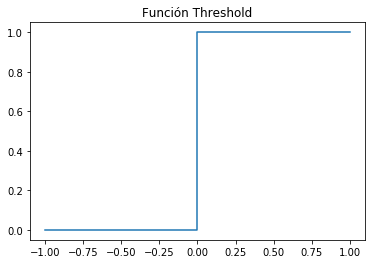

In [29]:
x = [-1,0,0,1] 
y = [0,0,1,1]

plt.plot(x, y, drawstyle='steps-pre')
plt.title("Función Threshold")
plt.show()

Analíticamente la representamos como:
$$
\hat{y_i} = f(x^{(i)};w,b) = \left\{ \begin{array}{lc}
       1 &  si \sum_j w_j \cdot x^{(i)}_j +b > \theta \\
       0 &  si  \sum_j w_j \cdot x^{(i)}_j +b < \theta
     \end{array} \right.
$$

Siendo $w_i$ los pesos de las entradas $x_i$ con un bias $b$, el código que ejecuta esta función es el siguiente:

In [2]:
# Funcion para calcular unit step
# Bias dentro de pesos con indice n + 1 en pesos[-1]
def Funcion(pesos, entrada):
    suma = np.dot(entrada,pesos)
    if suma >= 0:
        return 1
    else:
        return 0

Para implementar el algoritmo del perceptron debemos comprender su funcionamiento, un modelo referencial de ayuda es el siguiente:

<img src="https://miro.medium.com/max/2870/1*n6sJ4yZQzwKL9wnF5wnVNg.png">

Donde $w_0$ es nuestro bias o $b$, además de la función de paso ya mencionada anteriormente, la nos sirve para clasificar el resultado de la sumatoria entre el producto de los pesos con las entradas

In [3]:
# Definicion del algoritmo Perceptron
# Flag indica si solo usamos una iteracion al set completo
def Perceptron(entradas,esperados, T=1):
    inicio = time.time()
    ratio_entrenamiento = 0.05
    pesos = np.zeros(len(entradas[0]))
    errores = True
    iteracion = 0
    i = 0
    historico = [[],[]]
    while(T > 0):
        correctas = 0
        for entrada,esperado in zip(entradas,esperados):
            i += 1
            prediccion = Funcion(entrada,pesos)
            if esperado != prediccion:
                pesos += (esperado - prediccion) * entrada
            else:
                correctas += 1
        historico[1].append(list(pesos))
        historico[0].append(float(correctas)/len(X_train))
        T -= 1
    print("Tiempo usado por perceptron: %f [s]" % round(time.time()-inicio,3))
    return pesos,historico

Realizamos un par de funciones las cuales nos ayudaran a graficar los resultados obtenidos

In [4]:
# Funcion para graficar accuracy y pesos finales
def graficar(historico,pesos):
    plt.plot(range(len(historico))[::10],historico[::10],color="red")
    plt.scatter(range(len(historico)),historico,alpha="0.2")
    plt.xlabel("Época")
    plt.ylabel("Precisión")
    plt.title("Perceptron\nPrecisión entre épocas")
    plt.show()
    plt.barh(range(len(pesos)),pesos)
    plt.ylabel("Peso")
    plt.xlabel("Valor")
    plt.title("Perceptron\nValores finales de los pesos (incluye bias)")
    plt.show()

# Funcion para graficar el movimiento de los pesos en las epocas
def variacion_perceptron(graf):
    fig, axs = plt.subplots(7, 5, sharex=True)
    fig.set_figheight(15)
    fig.set_figwidth(25)
    fig.suptitle('Perceptron\nCambio de pesos entre épocas')
    num = 0
    i = 0
    col = 0
    fila = 0
    for column in range(len(graf[1][0])):
        datos = []
        for a in graf[1]:
            datos.append(a[i])
        axs[fila][col].plot(range(len(graf[1])), datos)
        axs[fila][col].title.set_text("Peso {}".format(i+1))
        col += 1
        col = col % 5
        if col == 0:
            fila += 1
        i += 1

Para ejecutar nuestro perceptron y obtener valores un vector de pesos para realizar clasificaciones con nuestro modelo necesitamos datos de entrenamiento, los cuales obtenemos con el siguiente código

In [5]:
# Obtenemos el dataset de entrenamiento y seteamos nuestros pesos en 0
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train,np.ones(len(X_train))] # Añadimos unos para el bias en el calculo

### Ejecución
Ejecutamos nuestro perceptron con los datos de entrenamiento obtenidos

In [6]:
# Utilizamos nuestro Perceptron y obtenemos el tiempo de ejecucion
pesos,historico = Perceptron(X_train,y_train,1000)

Tiempo usado por perceptron: 1.007000 [s]


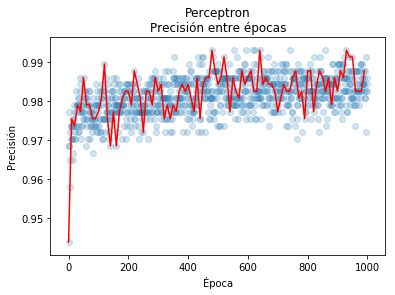

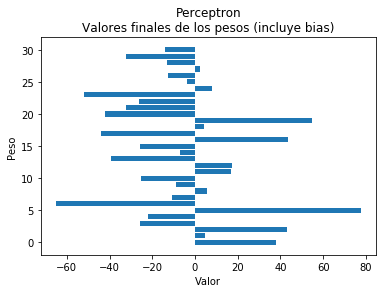

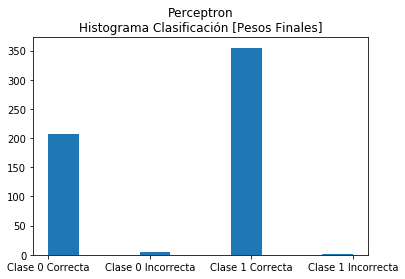

In [7]:
# Graficamos Precision y pesos
graficar(historico[0],pesos)
graf = [[[],[]],[[],[]],[[],[]],[[],[]]]
colors = list()
histo = []
labels = ["Clase 1 Correcta","Clase 0 Correcta","Clase 1 Incorrecta","Clase 0 Incorrecta"]
for a,b in zip(X_train,y_train):
    prob = Funcion(pesos,a)
    if prob == 1 and b == 1:
        histo.append(labels[0])
    elif prob == 0 and b == 0:
        histo.append(labels[1])
    elif b == 1:
        histo.append(labels[2])
    else:
        histo.append(labels[3])
plt.title("Perceptron\nHistograma Clasificación [Pesos Finales]")
plt.hist(histo,label=labels)
plt.show()

Con los datos del perceptron graficamos los pesos finales del modelo, la precisión entre épocas y la distribución de la clasificación con los pesos finales

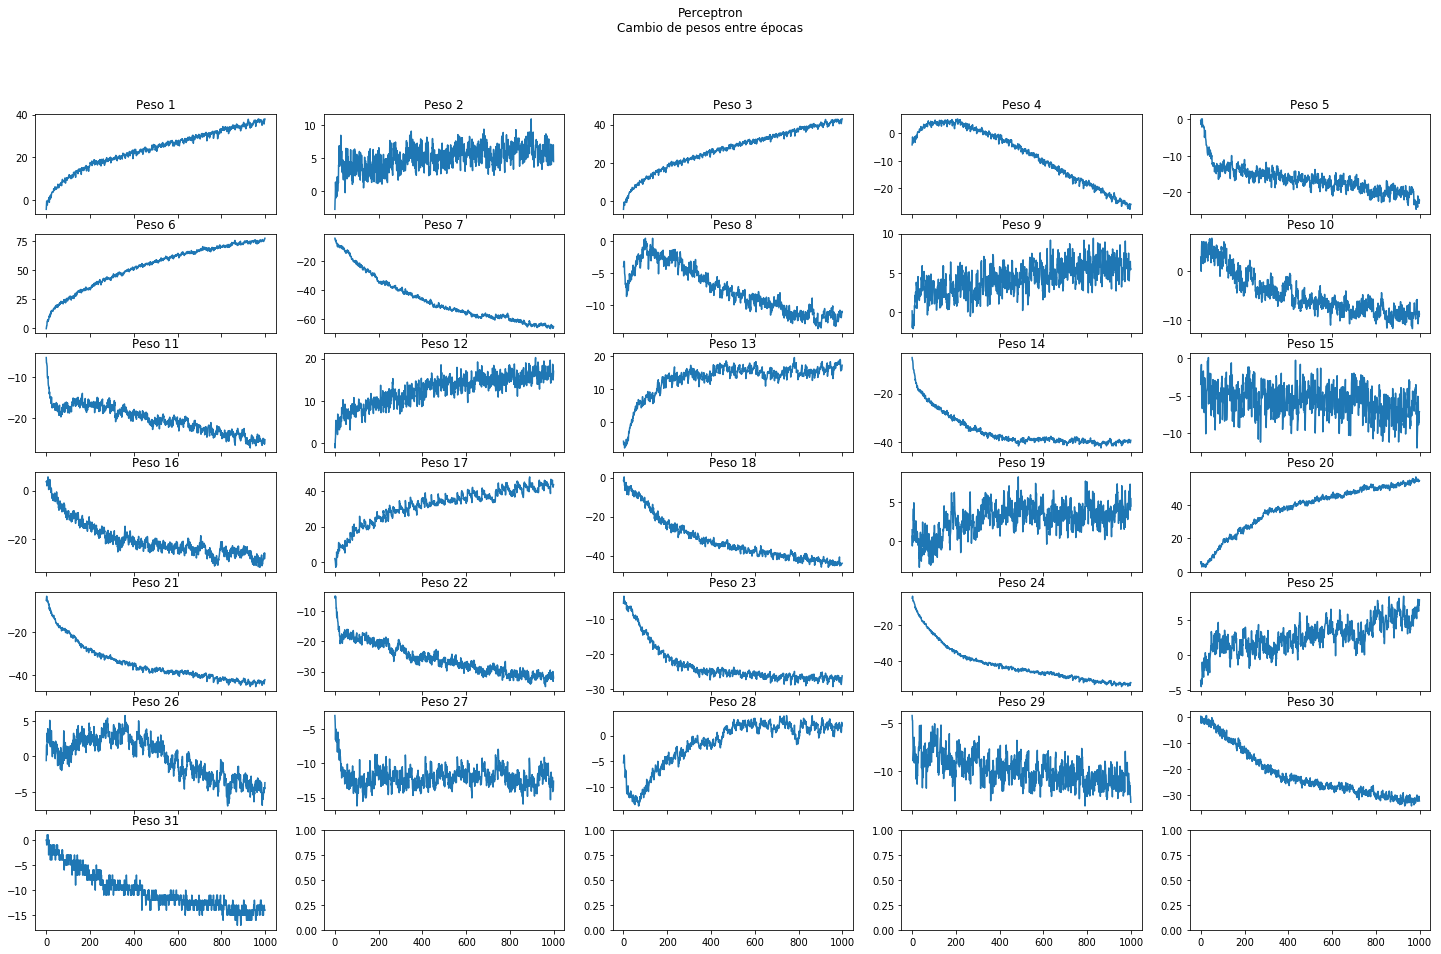

In [8]:
variacion_perceptron(historico)

En este gráfico vemos como los pesos cambian durante las épocas (nuestro bias se encuentra en la posición 31)

## Forgetron

### Implementación

Con las siguientes funciones implementamos el forgentron con una memoria de tamaño $K$

In [9]:
def var_alfas(ratio,pos):
    return ratio**pos

def modificar_mem(memoria_y):
    mem = []
    for y in memoria_y:
        if y == 0:
            mem.append(-1)
        else:
            mem.append(y)
    return mem

def y_sombrero(memoria_x,alfas,entrada,memoria_y):
    sum = 0
    for mem_x,mem_y,alfa in zip(memoria_x,memoria_y,alfas):
        sum += alfa * mem_y * np.dot(mem_x,entrada)
    if sum >= 0:
        return 1
    else:
        return 0

def Forgetron(X_train,y_train,K=10,T=1):
    pesos = [0] * len(X_train[0])
    ratio = 0.7
    alfas = [0] * K
    for a in range(len(alfas)):
        alfas[a] = var_alfas(ratio, a+1)
    memoria_x = [[0] * len(X_train[0])] * K
    memoria_y = [0] * K
    graf = []
    for a in range(T):
        aux = 0.0
        for x,y in zip(X_train,y_train):
            if y == y_sombrero(memoria_x,alfas,x,memoria_y):
                aux += 1
            else:
                memoria_x[:-1] = memoria_x[1:]
                memoria_x[-1] = list(x)
                memoria_y[:-1] = memoria_y[1:]
                memoria_y[-1] = y
                memoria_y = modificar_mem(memoria_y)
        graf.append(aux/len(X_train))
    return alfas,memoria_x,memoria_y,graf

### Ejecución

Nuevamente obtenemos los datos de entrenamiento para usarlo con el forgetron y lo ejecutamos

In [10]:
# Obtenemos el dataset de entrenamiento y seteamos nuestros pesos en 0
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train,np.ones(len(X_train))] # Añadimos unos para el bias en el calculo

alfas,memoria_x,memoria_y,graf_forg = Forgetron(X_train,y_train,10,1000)

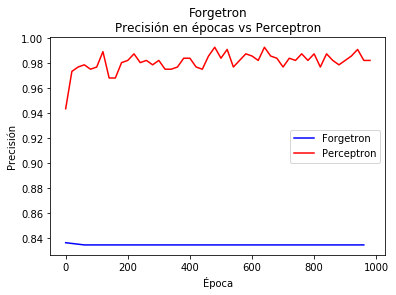

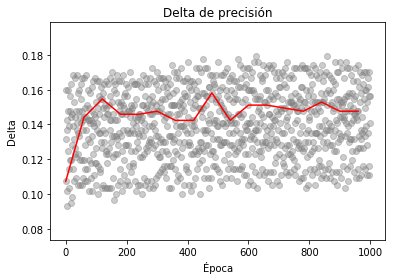

In [23]:
plt.plot(range(len(graf_forg))[::60],graf_forg[::60],label="Forgetron",color="Blue")
plt.plot(range(len(historico[0]))[::20],historico[0][::20],color="red",label="Perceptron")
plt.title("Forgetron\nPrecisión en épocas vs Perceptron")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.show()
delta = [x1 - x2 for (x1, x2) in zip(historico[0], graf_forg)]
plt.scatter(range(len(delta)),delta,alpha="0.4",color="gray")
plt.plot(range(len(delta))[::60],delta[::60],color="red")
plt.title("Delta de precisión")
plt.xlabel("Época")
plt.ylabel("Delta")
plt.show()

Acá graficamos la precisión de nuestro forgetron versus al perceptron que obtuvimos anteriormente, además graficamos la diferencia de precisiones (perceptron - forgetron) entre épocas y su distribución

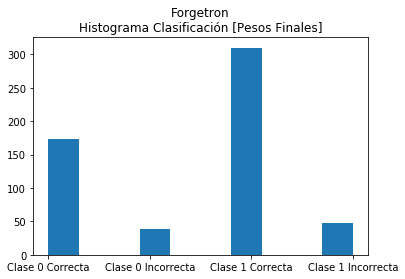

In [12]:
graf = [[[],[]],[[],[]],[[],[]],[[],[]]]
colors = list()
histo = []
labels = ["Clase 1 Correcta","Clase 0 Correcta","Clase 1 Incorrecta","Clase 0 Incorrecta"]
for a,b in zip(X_train,y_train):
    prob = y_sombrero(memoria_x,alfas,a,memoria_y)
    if prob == 1 and b == 1:
        histo.append(labels[0])
    elif prob == 0 and b == 0:
        histo.append(labels[1])
    elif b == 1:
        histo.append(labels[2])
    else:
        histo.append(labels[3])
plt.title("Forgetron\nHistograma Clasificación [Pesos Finales]")
plt.hist(histo,label=labels)
plt.show()

Acá graficamos el histograma de clasificaciones del forgetron

## Sigmoidal

### Implementación

Acá definimos las funciones necesarias para un cambio de función en nuestro perceptron, ahora con una distribución de probabilidad (sigmoidal) y no una función de threshold

In [13]:
# Función de pérdida logarítmica
def logloss(labels, entradas, pesos):
  suma = 0
  eps = 1e-15
  for label,entry in zip(labels,entradas):
        predicted = sigmoidal(sumatoria(entry,pesos))
        p = np.clip(predicted, eps, 1 - eps)
        suma -= label * np.log(p) + (1-label) * np.log(1-p)
  return suma

def sumatoria(entrada,pesos):
    return np.dot(entrada,pesos)

def sigmoidal(x, derivada=False):
    x = np.clip(x,-10,10)
    sigm = 1. / (1. + np.exp(-x))
    if derivada:
        return sigm * (1. - sigm)
    return sigm

def gradiente(entrada,pesos,esperado):
    suma = sumatoria(pesos,entrada)
    sigma = sigmoidal(suma)
    return entrada * (-esperado * (1 - sigma) + (1-esperado) * sigma)

def nuevo_modelo(entrada,pesos):
    return sigmoidal(np.dot(entrada,pesos))

def perdida(entrada,pesos,esperado):
    modelo = nuevo_modelo(entrada,pesos)
    return ((-1) * esperado * np.log(modelo) - (1 - esperado) * np.log(1 - modelo))

def PerceptronSigmoidal(X_train,y_train,T=1):
    ratio = 0.03
    pesos = np.zeros(len(X_train[0]), dtype=np.float64)
    graf = [[],[],[],[]]
    PESOS = list()
    for a in X_train[0]:
        PESOS.append(list())
    while T > 0:
        correctas = 0.0
        for entrada,esperado in zip(X_train,y_train):
            predicho = nuevo_modelo(entrada,pesos)
            if predicho >= 0.5:
                adivinar = 1
            else:
                adivinar = 0
            if esperado == adivinar:
                correctas += 1
            pesos -= ratio * gradiente(entrada,pesos,esperado)
        aux = 0
        for peso in pesos:
            PESOS[aux].append(peso)
            aux += 1
        error = logloss(y_train,X_train,pesos)
        graf[0].append(error)
        graf[1].append(pesos)
        graf[2].append(pesos[0])
        graf[3].append(correctas/float(len(X_train)))
        T -= 1
    return graf,PESOS,pesos

Desde acá implementamos nuestra función sigmoidal, la cual se comporta de la siguiente manera

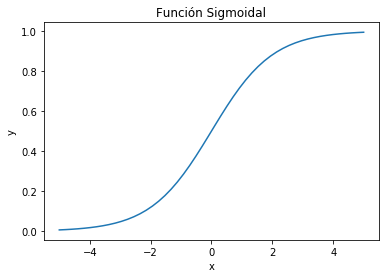

In [43]:
x = np.linspace(-5,5,50)
y = list()
for a in x:
    y.append(sigmoidal(a))
plt.plot(x,y)
plt.title("Función Sigmoidal")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Ejecución

Obtenemos el set de entrenamiento y ejecutamos nuestro algoritmo, en donde obtendremos los datos para producir nuestras gráficas

In [14]:
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train,np.ones(len(X_train))] # Añadimos unos para el bias en el calculo

graf_sig,PESOS,pesos = PerceptronSigmoidal(X_train,y_train,1000)

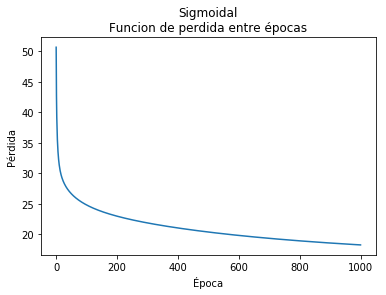

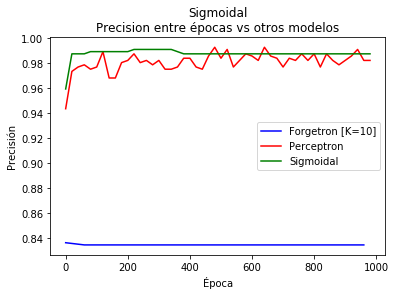

In [24]:
plt.plot(range(len(graf_sig[0])),graf_sig[0])
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.title("Sigmoidal\nFuncion de perdida entre épocas")
plt.show()
plt.plot(range(len(graf_forg))[::60],graf_forg[::60],label="Forgetron [K=10]",color="Blue")
plt.plot(range(len(historico[0]))[::20],historico[0][::20],color="red",label="Perceptron")
plt.plot(range(len(graf_sig[3]))[::20],graf_sig[3][::20],color="green",label="Sigmoidal")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.title("Sigmoidal\nPrecision entre épocas vs otros modelos")
plt.legend()
plt.show()

Con los datos obtenidos podemos apreciar la pérdida logarítmica entre épocas del sigmoide, la cual se reduce al pasar las épocas, a su vez también tenemos la comparativa de precisiones entre los tres métodos, de donde el perceptron y el sigmoide convergen a donde mismo pero con una precisión mayor más inmediata por parte del sigmoide

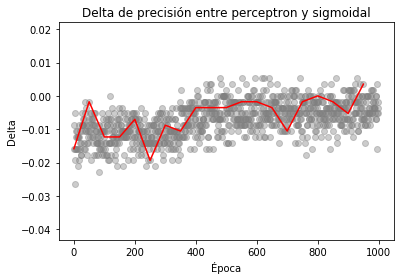

In [16]:
delta = [x1 - x2 for (x1, x2) in zip(historico[0], graf_sig[3])]
plt.scatter(range(len(delta)),delta,alpha="0.4",color="gray")
plt.plot(range(len(delta))[::50],delta[::50],color="red")
plt.title("Delta de precisión entre perceptron y sigmoidal")
plt.xlabel("Época")
plt.ylabel("Delta")
plt.show()

En este gráfico vemos la diferencia de precisión entre el sigmoide y el perceptron (perceptron - sigmoide), obteniendo una tendencia negativa, lo que nos dice que el sigmoide tiende a ser más preciso la mayor parte del tiempo

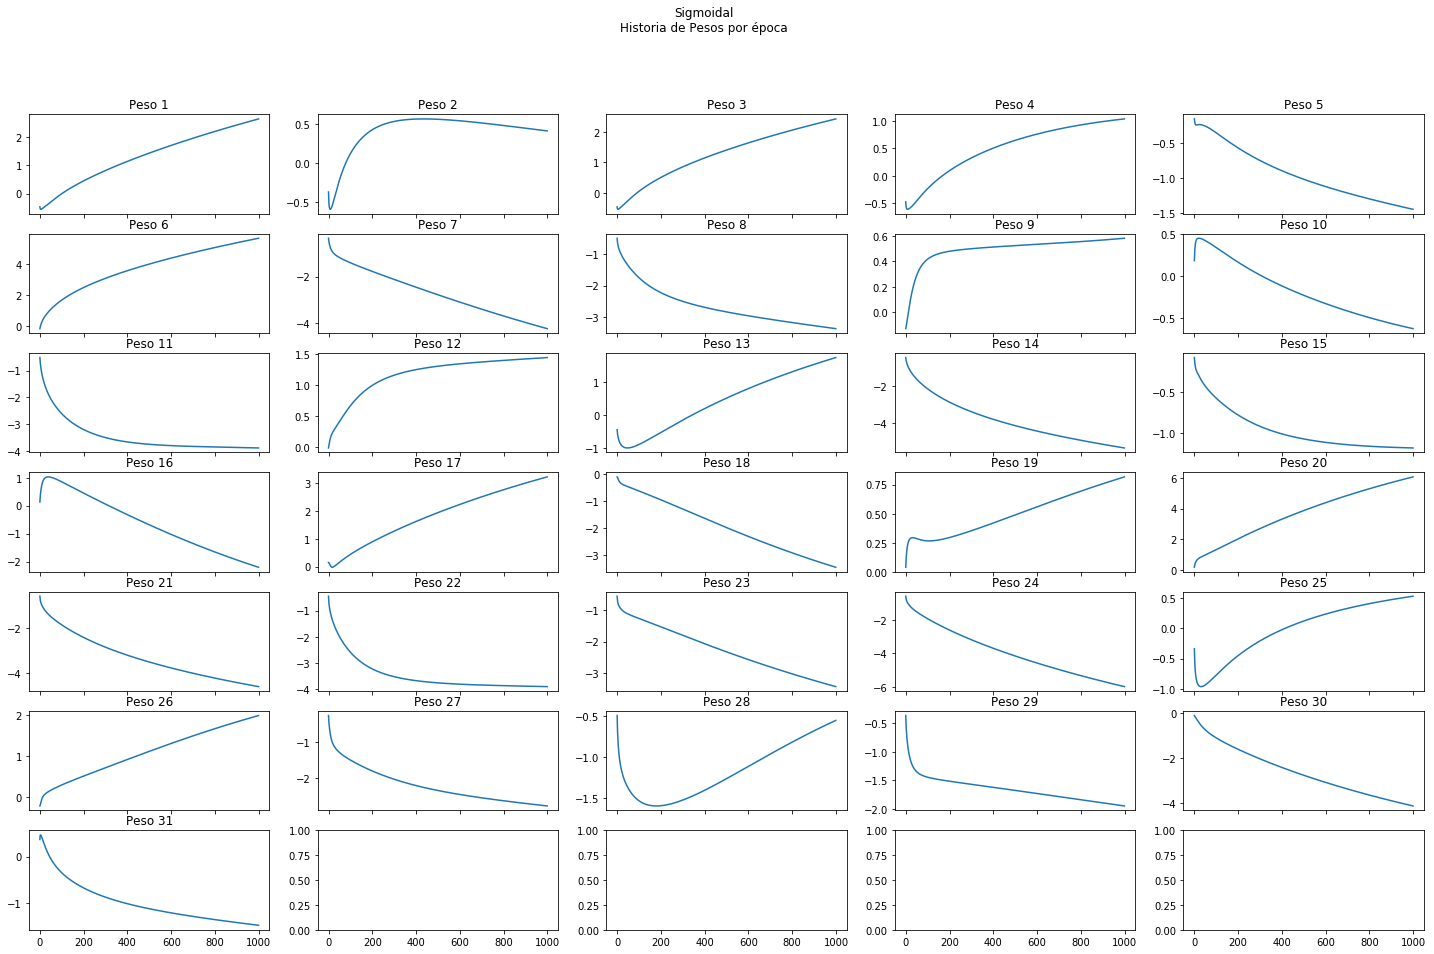

In [17]:
def variacion(datos):
    fig, axs = plt.subplots(7, 5, sharex=True)
    fig.set_figheight(15)
    fig.set_figwidth(25)
    fig.suptitle('Sigmoidal\nHistoria de Pesos por época')
    num = 0
    i = 0
    col = 0
    fila = 0
    for dato in datos:
        axs[fila][col].plot(range(len(dato)), dato)
        axs[fila][col].title.set_text("Peso {}".format(i+1))
        col += 1
        col = col % 5
        if col == 0:
            fila += 1
        i += 1
variacion(PESOS)

Acá podemos ver el comportamiento de los pesos durante las épocas, donde podemos notar ciertos comportamientos y tendencias de algunos pesos

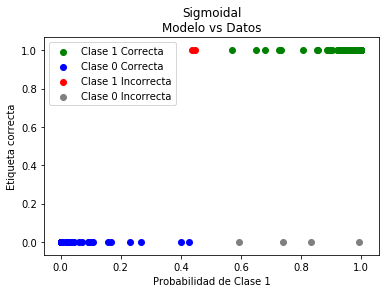

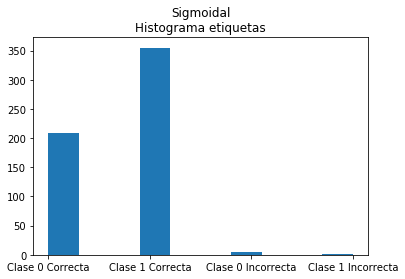

In [18]:
graf = [[[],[]],[[],[]],[[],[]],[[],[]]]
colors = list()
histo = []
labels = ["Clase 1 Correcta","Clase 0 Correcta","Clase 1 Incorrecta","Clase 0 Incorrecta"]
for a,b in zip(X_train,y_train):
    prob = sigmoidal(sumatoria(a,pesos))
    if prob >= 0.5 and b == 1:
        graf[0][0].append(prob)
        graf[0][1].append(b)
        histo.append(labels[0])
    elif prob < 0.5 and b == 0:
        graf[1][0].append(prob)
        graf[1][1].append(b)
        histo.append(labels[1])
    elif b == 1:
        graf[2][0].append(prob)
        graf[2][1].append(b)
        histo.append(labels[2])
    else:
        graf[3][0].append(prob)
        graf[3][1].append(b)
        histo.append(labels[3])
plt.scatter(graf[0][0],graf[0][1],color="green",label=labels[0])
plt.scatter(graf[1][0],graf[1][1],color="blue",label=labels[1])
plt.scatter(graf[2][0],graf[2][1],color="red",label=labels[2])
plt.scatter(graf[3][0],graf[3][1],color="gray",label=labels[3])
plt.title("Sigmoidal\nModelo vs Datos")
plt.xlabel("Probabilidad de Clase 1")
plt.ylabel("Etiqueta correcta")
plt.legend()
plt.show()
plt.title("Sigmoidal\nHistograma etiquetas")
plt.hist(histo,label=labels)
plt.show()

En estos gráficos estan las distribuciones de probabilidades de la sigmoidal y las clasificaciones correctas del set, además de el histograma de clasificaciones para el modelo sigmoidal

<a></a>
### Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] STEPHEN, I. (1990). *Perceptron-based learning algorithms*. IEEE Transactions on neural networks, 50(2), 179.  
[3] Dekel, O., Shalev-Shwartz, S., &amp; Singer, Y. (2006). *The Forgetron: A kernel-based perceptron on a fixed budget*. In Advances in neural information processing systems (pp. 259-266).  
[4] Ruder, S. (2016). *An overview of gradient descent optimization algorithms*. arXiv preprint arXiv:1609.04747.  